# Problem Statement :
X Education sells online courses to industry professionals.The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos.When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals.

Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not.The typical lead conversion rate at X education is around 30%.

Business Goal :
X Education needs help in selecting the most promising leads, i.e. the leads that are most likely to convert into paying customers.

The company needs a model wherein you a lead score is assigned to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance.

The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%

# Step 1: Reading the Data-Data Sanity


In [1]:
import warnings
warnings.filterwarnings('ignore')

# Importing the required packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score

In [2]:
# Importing dataset

leads = pd.read_csv('Leads.csv', encoding = 'latin')
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
# inspect lead dataframe

print(leads.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [4]:
# inspect lead dataframe

print(leads.shape)

(9240, 37)


In [5]:
# Columns having null values

print(leads.isnull().any())

Prospect ID                                      False
Lead Number                                      False
Lead Origin                                      False
Lead Source                                       True
Do Not Email                                     False
Do Not Call                                      False
Converted                                        False
TotalVisits                                       True
Total Time Spent on Website                      False
Page Views Per Visit                              True
Last Activity                                     True
Country                                           True
Specialization                                    True
How did you hear about X Education                True
What is your current occupation                   True
What matters most to you in choosing a course     True
Search                                           False
Magazine                                         False
Newspaper 

In [6]:
# inspect lead dataframe

leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


# Step 2: Data Cleaning/Preprocessing

In [7]:
# Checking for percentage of null values in each column

percentage_missing = round(100*(leads.isnull().sum()/len(leads.index)), 2)
print(percentage_missing)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [8]:
# Following columns have a value called select. Convert those values as nan since the customer has not selected any options for 
# these columns while entering the data.

# a) Specialization
# b) How did you hear about X Education
# c) Lead Profile
# d) City

# Converting 'Select' values to NaN.

leads['Specialization'] = leads['Specialization'].replace('Select', np.nan)
leads['How did you hear about X Education'] = leads['How did you hear about X Education'].replace('Select', np.nan)
leads['Lead Profile'] = leads['Lead Profile'].replace('Select', np.nan)
leads['City'] = leads['City'].replace('Select', np.nan)

In [9]:
# checking for percentage of null values in each column

percentage_missing = round(100*(leads.isnull().sum()/len(leads.index)), 2)
print(percentage_missing)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

There are some columns that have more than 30% null values.

In [10]:
# Let us drop the following columns that have more than 30% null values

# a) Specialization
# b) How did you hear about X Education
# c) Tags
# d) Lead Quality
# e) Lead Profile
# f) City
# g) Asymmetrique Activity Index
# h) Asymmetrique Profile Index
# i) Asymmetrique Activity Score
# j) Asymmetrique Profile Score

leads = leads.drop(['Specialization', 'How did you hear about X Education', 'Tags', 'Lead Quality',
                          'Lead Profile','City', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index',
                          'Asymmetrique Activity Score', 'Asymmetrique Profile Score'], axis=1)

In [11]:
# checking for percentage of null values in each column after dropping columns having more than 30% null values

percentage_missing = round(100*(leads.isnull().sum()/len(leads.index)), 2)
print(percentage_missing)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

Following columns have null values : - Country - Lead Source - Total Visits - Page Views Per Visit - Last Activity
- What is your current occupation - What matters most to you in choosing a course

Let us see and decide whather we need to impute values in the above column or drop the columns.

In [12]:
# Checking the value counts for each values in the country column

leads.Country.value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

In [13]:
# checking the percentage of India as value in the country column

country_percentage = round(100*len(leads[leads['Country'] == 'India'])/len(leads['Country']),2)
print(country_percentage)

70.26


In [14]:
# Since "India" occurs around 70% of times in the Country column, and country column also has around 27% as missing values, 
# we shall go ahead and drop the column

leads = leads.drop(['Country'], axis=1)

In [15]:
# Checking the value counts for the column Lead Source

leads['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [16]:
# From the above it can be noticed that Google appears twice with different cases. Hence we shall convert all rows with value 
# "Google" to the same case.
# Also since "Google" has the major chunk of data, we can impute the null values with Google

leads['Lead Source'] = leads['Lead Source'].replace('google', 'Google')
leads['Lead Source'] = leads['Lead Source'].replace(np.nan, 'Google')

In [17]:
# Checking the value counts for the column Total Visits

leads['TotalVisits'].value_counts()

0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
21.0        6
23.0        6
24.0        5
25.0        5
27.0        5
22.0        3
29.0        2
28.0        2
26.0        2
141.0       1
55.0        1
30.0        1
43.0        1
74.0        1
41.0        1
54.0        1
115.0       1
251.0       1
32.0        1
42.0        1
Name: TotalVisits, dtype: int64

In [18]:
# Checking the median of column 

leads['TotalVisits'].median()

3.0

In [19]:
# Imputing the null values in TotalVisits by the median value which is 3.0

leads['TotalVisits'] = leads['TotalVisits'].replace(np.nan, leads['TotalVisits'].median())

In [20]:
# Checking the value counts for Page Views Per Visit

leads['Page Views Per Visit'].value_counts()

0.00    2189
2.00    1795
3.00    1196
4.00     896
1.00     651
        ... 
3.43       1
2.56       1
6.33       1
1.64       1
2.08       1
Name: Page Views Per Visit, Length: 114, dtype: int64

In [21]:
# Checking the median of the column

leads['Page Views Per Visit'].median()

2.0

In [22]:
# Imputing the null values in 'Page Views Per Visit' by the median value which is 2.0

leads['Page Views Per Visit'] = leads['Page Views Per Visit'].replace(np.nan, leads['Page Views Per Visit'].median())

In [23]:
# Checking the value counts for the column Last Activity

leads['Last Activity'].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [24]:
# Since we do not have any information of what the last activity of the customer would have been, we can add a new category 
# called 'Not Sure' for the null values

leads['Last Activity'] = leads['Last Activity'].replace(np.nan, 'Not Sure')

In [25]:
# Checking the value counts for the column "What is your current Occupation"

leads['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [26]:
# Since no information has been provided Current Occupation, we can add a new category called No Information and set that as value for the null columns

leads['What is your current occupation'] = leads['What is your current occupation'].replace(np.nan, 'No Information')

In [27]:
# Checking the value counts for the column What matters most to you in choosing a course 

leads['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [28]:
matters_most_percentage = round(100*len(leads[leads['What matters most to you in choosing a course'] 
                            == 'Better Career Prospects'])/len(leads['What matters most to you in choosing a course']),2)
print(matters_most_percentage)

70.65


In [29]:
# Since Better Career Prospects occurs around 70% of times in the What matters most to you in choosing a course column, and
# since the column also has around 29% as missing values, we shall go ahead and drop the column

leads = leads.drop(['What matters most to you in choosing a course'], axis=1)

In [30]:
# check for percentage of null values in each column

percentage_missing = round(100*(leads.isnull().sum()/len(leads.index)), 2)
print(percentage_missing)

Prospect ID                                 0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                     0.0
Receive More Updates About Our Courses      0.0
Update me on Supply Chain Content       

All the null values in the columns now have either been imputed or we have dropped the columns which have more than 70% data concentrated towards one value

In [31]:
# Since the following columns have only one value "No" in all the rows, we can eliminate the columns :

# a) Magazine
# b) Receive More Updates About Our Courses
# c) Update me on Supply Chain Content
# d) Get updates on DM Content
# e) I agree to pay the amount through cheque

leads = leads.drop(['Magazine', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 
                          'Get updates on DM Content', 'I agree to pay the amount through cheque'], axis=1)

In [32]:
leads.shape

(9240, 20)

# OUTLIER TREATMENT

In [33]:
# Checking outliers at 25%,50%,75%,90%,95% and above
leads.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000
mean,617188.435606,0.385390,3.438636,487.698268,2.357440
std,23405.995698,0.486714,4.819024,548.021466,2.145781
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000
90%,650506.100000,1.000000,7.000000,1380.000000,5.000000
95%,655404.050000,1.000000,10.000000,1562.000000,6.000000
99%,659592.980000,1.000000,17.000000,1840.610000,9.000000


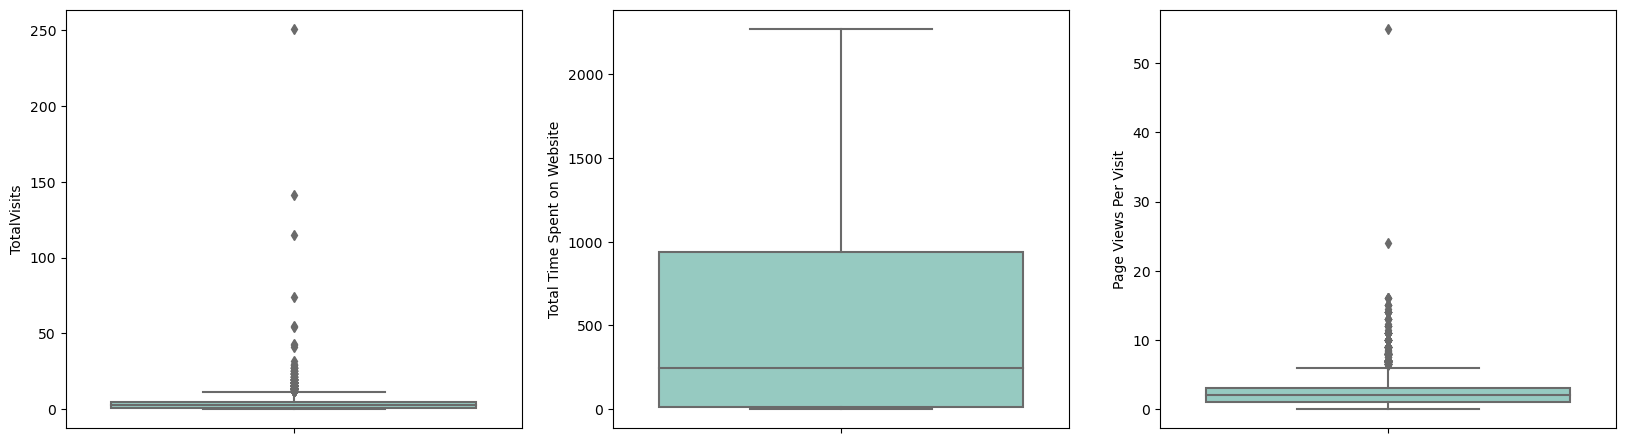

In [34]:
# Checking the outliers in all the numeric columns

plt.figure(figsize=(20, 25))
plt.subplot(4,3,1)
sns.boxplot(y = 'TotalVisits', palette='Set3', data = leads)
plt.subplot(4,3,2)
sns.boxplot(y = 'Total Time Spent on Website', palette='Set3', data = leads)
plt.subplot(4,3,3)
sns.boxplot(y = 'Page Views Per Visit', palette='Set3', data = leads)
plt.show()

In [35]:
# Removing values beyond 99% for Total Visits

nn_quartile_total_visits = leads['TotalVisits'].quantile(0.99)
leads = leads[leads["TotalVisits"] < nn_quartile_total_visits]
leads["TotalVisits"].describe(percentiles=[.25,.5,.75,.90,.95,.99])

count    9141.000000
mean        3.179740
std         2.913631
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%         9.000000
99%        13.000000
max        16.000000
Name: TotalVisits, dtype: float64

In [36]:
# Checking outliers at 25%,50%,75%,90%,95% and above

leads.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9141.00000,9141.000000,9141.000000,9141.000000,9141.000000
mean,617233.45192,0.385406,3.179740,486.074609,2.329506
std,23413.72193,0.486718,2.913631,547.856302,2.046673
min,579533.00000,0.000000,0.000000,0.000000,0.000000
25%,596519.00000,0.000000,1.000000,10.000000,1.000000
50%,615563.00000,0.000000,3.000000,247.000000,2.000000
75%,637414.00000,1.000000,5.000000,933.000000,3.000000
90%,650514.00000,1.000000,7.000000,1379.000000,5.000000
95%,655406.00000,1.000000,9.000000,1561.000000,6.000000
99%,659592.80000,1.000000,13.000000,1839.600000,9.000000


In [37]:
# Removing values beyond 99% for page Views Per Visit

nn_quartile_page_visits = leads['Page Views Per Visit'].quantile(0.99)
leads = leads[leads["Page Views Per Visit"] < nn_quartile_page_visits]
leads["Page Views Per Visit"].describe(percentiles=[.25,.5,.75,.90,.95,.99])

count    9029.000000
mean        2.226383
std         1.823395
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
90%         5.000000
95%         6.000000
99%         7.000000
max         8.000000
Name: Page Views Per Visit, dtype: float64

In [38]:
# Checking outliers at 25%,50%,75%,90%,95% and above
leads.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9029.000000,9029.000000,9029.000000,9029.000000,9029.000000
mean,617223.248422,0.385092,3.087164,483.133016,2.226383
std,23372.383121,0.486644,2.801244,547.420675,1.823395
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596530.000000,0.000000,1.000000,7.000000,1.000000
50%,615645.000000,0.000000,3.000000,245.000000,2.000000
75%,637360.000000,1.000000,4.000000,929.000000,3.000000
90%,650463.200000,1.000000,7.000000,1378.000000,5.000000
95%,655351.600000,1.000000,8.000000,1558.000000,6.000000
99%,659577.800000,1.000000,13.000000,1839.720000,7.000000


In [39]:
# Determine the percentage of data retained

num_data = round(100*(len(leads)/9240),2)
print(num_data)

97.72


#### At this point, the data has been cleaned and around 98% of data has been retained

## Data Visualization:

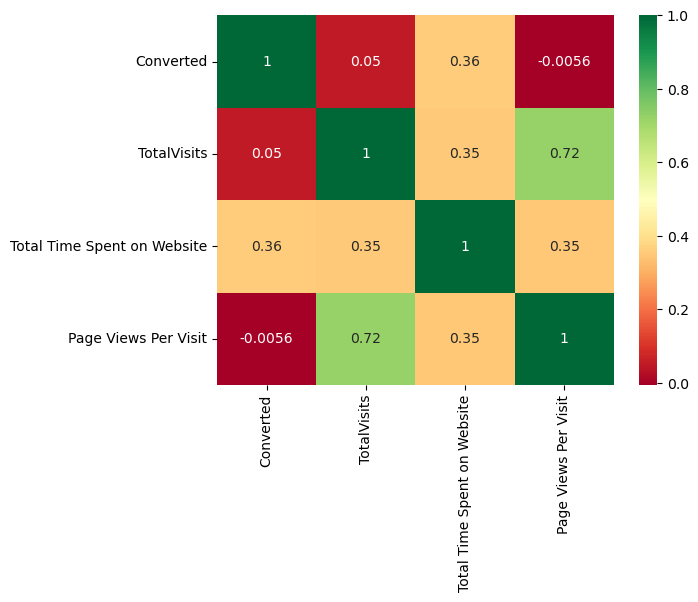

In [40]:
# Numerical vs Numerical variables comparison:
# Correlation heatmap for various numeric variables:
sns.heatmap(leads[["Converted","TotalVisits","Total Time Spent on Website","Page Views Per Visit"]].corr(), annot= True, cmap= "RdYlGn")
plt.show()

# Observations:
# 1. There is not much correlation between converted and visited.
# 2. There is a decent correlation between time spent on website and converted.

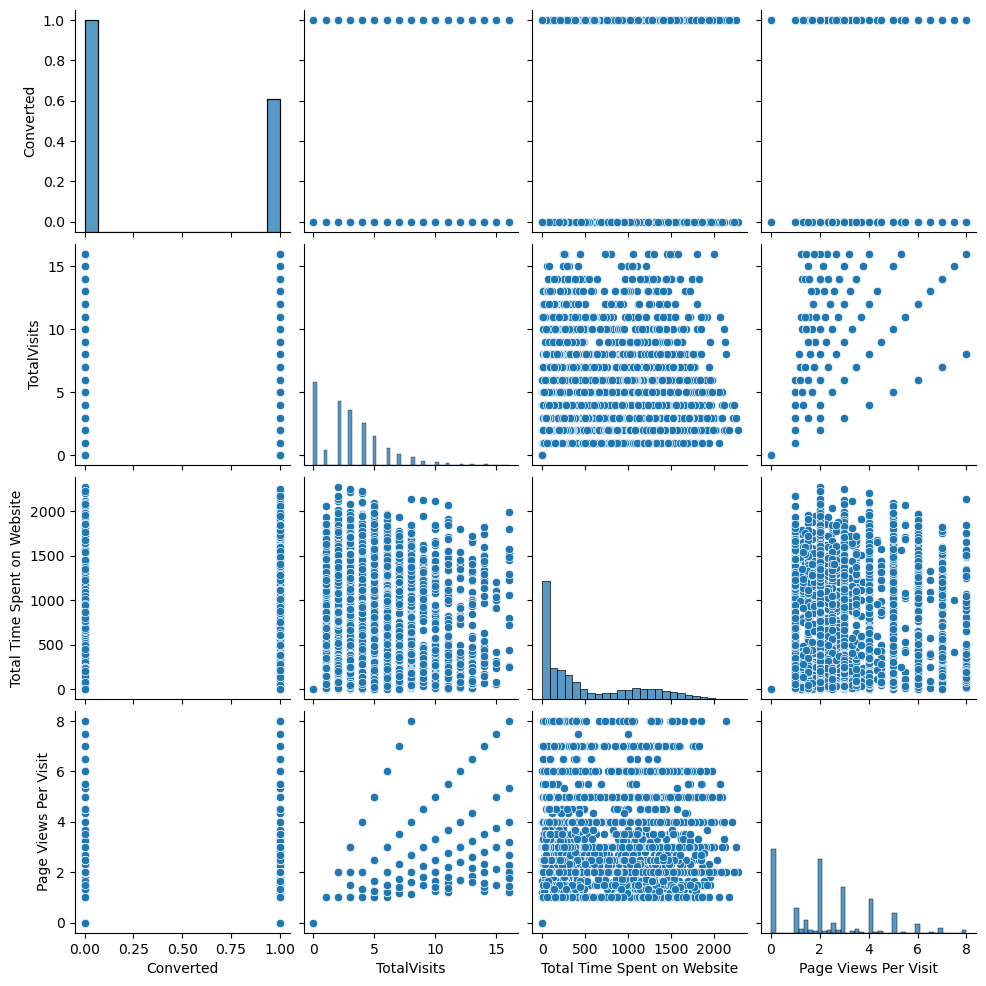

In [41]:
# Pair plots for various numeric variables
sns.pairplot(leads,vars=["Converted","TotalVisits","Total Time Spent on Website","Page Views Per Visit"])
plt.show()

At this point, the data has been cleaned and around 98% of data has been retained

## STEP 4-DATA ANALYSIS

### Dummy Variable Creation

In [42]:
# looking for categorical columns
categorical= leads.select_dtypes(include=['object']).columns
categorical

Index(['Prospect ID', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Do Not Call', 'Last Activity', 'What is your current occupation',
       'Search', 'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [43]:
# Creating Dummy Variables for categorical variables:
dummy_variables = pd.get_dummies(leads[['Lead Origin', 'Lead Source', 'Do Not Email','Do Not Call', 'Last Activity',
                              'What is your current occupation','A free copy of Mastering The Interview','Search', 
                              'Newspaper Article', 'X Education Forums', 'Newspaper','Digital Advertisement',
                              'Through Recommendations', 'Last Notable Activity']], drop_first=True)

In [44]:
# Merging the dummy variables to the base data:
data_new = pd.concat([leads, dummy_variables], axis=1)
data_new.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,0,0,1,0,0,0,0,0,0,0


In [45]:
# Removing the original columns for which the dummy variables are created:
data_new = data_new.drop(['Prospect ID','Lead Origin', 'Lead Source', 'Do Not Email','Do Not Call', 'Last Activity',
                    'What is your current occupation','A free copy of Mastering The Interview','Search', 
                    'Newspaper Article', 'X Education Forums', 'Newspaper','Digital Advertisement',
                    'Through Recommendations', 'Last Notable Activity'], 1)

In [46]:
data_new.shape

(9029, 73)

### Spilting the Data into Training and Test Sets:

In [47]:
np.random.seed(0)
data_train, data_test = train_test_split(data_new, train_size = 0.7, test_size = 0.3, random_state = 100)

In [48]:
print(data_train.shape)
print(data_test.shape)

(6320, 73)
(2709, 73)


### Rescaling the Features:

In [49]:
scaler = MinMaxScaler()

In [50]:
# Applying scaler() to all the columns except the 'yes-no' and 'dummy' variables:
numeric_variable = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
data_train[numeric_variable] = scaler.fit_transform(data_train[numeric_variable])
data_train.head()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
5493,607765,0,0.1250,0.042254,0.250,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
8064,588073,0,0.1875,0.041373,0.375,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
4716,614586,0,0.1875,0.099032,0.375,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
9117,580457,0,0.0000,0.000000,0.000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2402,636665,1,0.3750,0.381162,0.250,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
data_train.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
count,6320.000000,6320.000000,6320.000000,6320.000000,6320.000000,6320.000000,6320.000000,6320.000000,6320.0,6320.000000,...,6320.0,6320.000000,6320.000000,6320.000000,6320.000000,6320.000000,6320.000000,6320.000000,6320.000000,6320.000000
mean,617355.595411,0.381487,0.194502,0.212107,0.280978,0.527690,0.075949,0.006487,0.0,0.279747,...,0.0,0.001582,0.373418,0.019620,0.032278,0.000158,0.234019,0.003481,0.004589,0.000158
std,23202.667237,0.485790,0.176284,0.239873,0.229087,0.499272,0.264938,0.080289,0.0,0.448910,...,0.0,0.039750,0.483750,0.138702,0.176753,0.012579,0.423418,0.058902,0.067589,0.012579
min,579533.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,597150.750000,0.000000,0.062500,0.004291,0.125000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,615961.000000,0.000000,0.187500,0.105634,0.250000,1.000000,0.000000,0.000000,0.0,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,637192.500000,1.000000,0.250000,0.406690,0.375000,1.000000,0.000000,0.000000,0.0,1.000000,...,0.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,660728.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,...,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Dividing into X and Y sets for the model building

In [52]:
y_train = data_train.pop('Converted')
X_train = data_train

In [53]:
# Using RFE with output variable equals 20
logreg = LogisticRegression()
rfe = RFE(estimator = logreg, n_features_to_select=20)
rfe = rfe.fit(X_train, y_train)

In [54]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Lead Number', True, 1),
 ('TotalVisits', False, 47),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 5),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 16),
 ('Lead Origin_Quick Add Form', False, 49),
 ('Lead Source_Direct Traffic', True, 1),
 ('Lead Source_Facebook', False, 15),
 ('Lead Source_Google', False, 17),
 ('Lead Source_Live Chat', False, 27),
 ('Lead Source_NC_EDM', False, 37),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 4),
 ('Lead Source_Pay per Click Ads', False, 52),
 ('Lead Source_Press_Release', False, 39),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 12),
 ('Lead Source_Social Media', False, 46),
 ('Lead Source_WeLearn', False, 32),
 ('Lead Source_Welingak Website', False, 3),
 ('Lead Source_bing', False, 31),
 ('Lead Source_blog', False, 45),
 ('Lead Source_testone', False, 50),
 ('Lead Source_

In [55]:
col = X_train.columns[rfe.support_]
col

Index(['Lead Number', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Direct Traffic', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Do Not Email_Yes',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Email Opened', 'Last Activity_Olark Chat Conversation',
       'Last Activity_SMS Sent',
       'What is your current occupation_No Information',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'A free copy of Mastering The Interview_Yes',
       'Last Notable Activity_Email Opened', 'Last Notable Activity_Modified',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [56]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit', 'Lead Origin_Lead Import',
       'Lead Origin_Quick Add Form', 'Lead Source_Facebook',
       'Lead Source_Google', 'Lead Source_Live Chat', 'Lead Source_NC_EDM',
       'Lead Source_Organic Search', 'Lead Source_Pay per Click Ads',
       'Lead Source_Press_Release', 'Lead Source_Referral Sites',
       'Lead Source_Social Media', 'Lead Source_WeLearn',
       'Lead Source_Welingak Website', 'Lead Source_bing', 'Lead Source_blog',
       'Lead Source_testone', 'Lead Source_welearnblog_Home',
       'Lead Source_youtubechannel', 'Do Not Call_Yes',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Marked Spam',
       'Last Activity_Email Received',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Had a Phone Conversation', 'Last Activity_Not Sure',
       'Last Activity_Page Visited on Website',
       'Last Activity_Resubscribed to emails', 'Last Activity_Unreachable',
       'Last Activity_Unsubscribe

### Building Model using Statsmodel

In [57]:
# Creating X_test dataframe with RFE selected variables:
X_train_rfe = X_train[col]
X_train_rfe.columns

Index(['Lead Number', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Direct Traffic', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Do Not Email_Yes',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Email Opened', 'Last Activity_Olark Chat Conversation',
       'Last Activity_SMS Sent',
       'What is your current occupation_No Information',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'A free copy of Mastering The Interview_Yes',
       'Last Notable Activity_Email Opened', 'Last Notable Activity_Modified',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [58]:
# Model 1: 
X_train_lm_1 = sm.add_constant(X_train_rfe)
logm1 = sm.GLM(y_train,X_train_lm_1, family = sm.families.Binomial()).fit()
print(logm1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6299
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2528.1
Date:                Mon, 18 Dec 2023   Deviance:                       5056.3
Time:                        22:14:53   Pearson chi2:                 6.40e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.4111
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [59]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs for Model 1:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Lead Number,54.06
14,What is your current occupation_Unemployed,23.83
13,What is your current occupation_No Information,12.32
17,Last Notable Activity_Email Opened,11.14
10,Last Activity_Email Opened,9.71
19,Last Notable Activity_SMS Sent,9.16
12,Last Activity_SMS Sent,8.01
18,Last Notable Activity_Modified,6.66
2,Lead Origin_Landing Page Submission,4.86
3,Lead Origin_Lead Add Form,4.19


In [60]:
# Here variable "A free copy of Mastering The Interview_Yes" has very high p-value as compaired to alpha of 5%, 
# hence dropping that column 
X_train_new = X_train_rfe.drop(["A free copy of Mastering The Interview_Yes"], axis=1)

In [61]:
# Model 2:
X_train_lm_2 = sm.add_constant(X_train_new)
logm2 = sm.GLM(y_train,X_train_lm_2, family = sm.families.Binomial()).fit()
print(logm2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6300
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2528.2
Date:                Mon, 18 Dec 2023   Deviance:                       5056.4
Time:                        22:14:54   Pearson chi2:                 6.40e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.4111
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [62]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs for Model 2:
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Lead Number,53.99
14,What is your current occupation_Unemployed,23.77
13,What is your current occupation_No Information,12.30
16,Last Notable Activity_Email Opened,11.14
10,Last Activity_Email Opened,9.71
18,Last Notable Activity_SMS Sent,9.16
12,Last Activity_SMS Sent,8.01
17,Last Notable Activity_Modified,6.66
2,Lead Origin_Landing Page Submission,4.38
3,Lead Origin_Lead Add Form,4.19


In [63]:
# Here variable "What is your current occupation_Unemployed" has very high p-value as compaired to alpha of 5% and very high VIF (VIF > 5) 
# hence dropping that column 
X_train_new = X_train_new.drop(["What is your current occupation_Unemployed"], axis=1)

In [64]:
# Model 3:
X_train_lm_3 = sm.add_constant(X_train_new)
logm3 = sm.GLM(y_train,X_train_lm_3, family = sm.families.Binomial()).fit()
print(logm3.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6301
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2528.9
Date:                Mon, 18 Dec 2023   Deviance:                       5057.7
Time:                        22:14:54   Pearson chi2:                 6.40e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.4110
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [65]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs for Model 3:
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Lead Number,19.24
15,Last Notable Activity_Email Opened,11.14
10,Last Activity_Email Opened,9.71
17,Last Notable Activity_SMS Sent,9.15
12,Last Activity_SMS Sent,8.01
16,Last Notable Activity_Modified,6.66
2,Lead Origin_Landing Page Submission,4.38
3,Lead Origin_Lead Add Form,4.18
6,Lead Source_Reference,3.75
5,Lead Source_Olark Chat,2.38


In [66]:
# Here variable "Last Activity_Email Bounced " has very high p-value as compaired to alpha of 5% and very high VIF (VIF > 5) 
# hence dropping that column 
X_train_new = X_train_new.drop(["Last Activity_Email Bounced"], axis=1)

In [67]:
# Model 4:
X_train_lm_4 = sm.add_constant(X_train_new)
logm4 = sm.GLM(y_train,X_train_lm_4, family = sm.families.Binomial()).fit()
print(logm4.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6302
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2529.9
Date:                Mon, 18 Dec 2023   Deviance:                       5059.9
Time:                        22:14:55   Pearson chi2:                 6.40e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.4108
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [68]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs for Model 4:
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Lead Number,19.21
14,Last Notable Activity_Email Opened,10.98
9,Last Activity_Email Opened,9.38
16,Last Notable Activity_SMS Sent,9.00
11,Last Activity_SMS Sent,7.62
15,Last Notable Activity_Modified,6.45
2,Lead Origin_Landing Page Submission,4.38
3,Lead Origin_Lead Add Form,4.18
6,Lead Source_Reference,3.75
5,Lead Source_Olark Chat,2.38


In [69]:
# Here variable "Last Activity_Converted to Lead" has very high p-value as compaired to alpha of 5%, 
# hence dropping that column 
X_train_new = X_train_new.drop(["Last Activity_Converted to Lead"], axis=1)

In [70]:
# Model 5:
X_train_lm_5 = sm.add_constant(X_train_new)
logm5 = sm.GLM(y_train,X_train_lm_5, family = sm.families.Binomial()).fit()
print(logm5.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6303
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2531.4
Date:                Mon, 18 Dec 2023   Deviance:                       5062.8
Time:                        22:14:55   Pearson chi2:                 6.38e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.4105
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [71]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs for Model 5:
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Lead Number,18.71
13,Last Notable Activity_Email Opened,10.49
15,Last Notable Activity_SMS Sent,8.61
8,Last Activity_Email Opened,8.22
10,Last Activity_SMS Sent,6.77
14,Last Notable Activity_Modified,5.85
2,Lead Origin_Landing Page Submission,4.36
3,Lead Origin_Lead Add Form,4.17
6,Lead Source_Reference,3.75
5,Lead Source_Olark Chat,2.36


In [72]:
# Here variable "Lead Origin_Landing Page Submission" has high p-value as compaired to alpha of 5%, 
# hence dropping that column 
X_train_new = X_train_new.drop(["Lead Origin_Landing Page Submission"], axis=1)

In [73]:
# Model 6:
X_train_lm_6 = sm.add_constant(X_train_new)
logm6 = sm.GLM(y_train,X_train_lm_6, family = sm.families.Binomial()).fit()
print(logm6.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6304
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2533.0
Date:                Mon, 18 Dec 2023   Deviance:                       5066.0
Time:                        22:14:56   Pearson chi2:                 6.38e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.4102
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [74]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs for Model 6:
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Lead Number,16.22
12,Last Notable Activity_Email Opened,10.48
14,Last Notable Activity_SMS Sent,8.61
7,Last Activity_Email Opened,8.21
9,Last Activity_SMS Sent,6.77
13,Last Notable Activity_Modified,5.85
2,Lead Origin_Lead Add Form,3.96
5,Lead Source_Reference,3.75
1,Total Time Spent on Website,2.26
4,Lead Source_Olark Chat,1.95


In [75]:
# Here variable "Last Notable Activity_SMS Sent" has high p-value as compaired to alpha of 5%, 
# hence dropping that column 
X_train_new = X_train_new.drop(["Last Notable Activity_SMS Sent"], axis=1)

In [76]:
# Model 7:
X_train_lm_7 = sm.add_constant(X_train_new)
logm7 = sm.GLM(y_train,X_train_lm_7, family = sm.families.Binomial()).fit()
print(logm7.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6305
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2534.8
Date:                Mon, 18 Dec 2023   Deviance:                       5069.5
Time:                        22:14:56   Pearson chi2:                 6.37e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.4099
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [77]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs for Model 7:
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Lead Number,13.01
12,Last Notable Activity_Email Opened,8.49
7,Last Activity_Email Opened,7.99
2,Lead Origin_Lead Add Form,3.96
5,Lead Source_Reference,3.75
13,Last Notable Activity_Modified,3.43
9,Last Activity_SMS Sent,3.04
1,Total Time Spent on Website,2.26
4,Lead Source_Olark Chat,1.95
8,Last Activity_Olark Chat Conversation,1.91


In [78]:
# Now all the variables have p-value with the limit of alpha 5% but the variable "Lead Number" has a high VIF (VIF>5) 
# hence dropping that column 
X_train_new = X_train_new.drop(["Lead Number"], axis=1)

In [79]:
# Model 8:
X_train_lm_8 = sm.add_constant(X_train_new)
logm8 = sm.GLM(y_train,X_train_lm_8, family = sm.families.Binomial()).fit()
print(logm8.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6306
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2549.3
Date:                Mon, 18 Dec 2023   Deviance:                       5098.7
Time:                        22:14:56   Pearson chi2:                 6.46e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.4072
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [80]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs for Model 8:
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,Last Activity_Email Opened,7.71
11,Last Notable Activity_Email Opened,7.47
1,Lead Origin_Lead Add Form,3.87
4,Lead Source_Reference,3.75
12,Last Notable Activity_Modified,2.21
0,Total Time Spent on Website,1.90
3,Lead Source_Olark Chat,1.81
7,Last Activity_Olark Chat Conversation,1.79
8,Last Activity_SMS Sent,1.69
9,What is your current occupation_No Information,1.57


In [81]:
# Now all the variables have p-value with the limit of alpha 5% but the variable "Last Activity_Email Opened" has a high VIF (VIF>5) 
# hence dropping that column 
X_train_new = X_train_new.drop(["Last Activity_Email Opened"], axis=1)

In [82]:
# Model 9:
X_train_lm_9 = sm.add_constant(X_train_new)
logm9 = sm.GLM(y_train,X_train_lm_9, family = sm.families.Binomial()).fit()
print(logm9.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6307
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2558.8
Date:                Mon, 18 Dec 2023   Deviance:                       5117.5
Time:                        22:14:57   Pearson chi2:                 6.54e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.4054
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [83]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs for Model 9:
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Lead Origin_Lead Add Form,3.86
4,Lead Source_Reference,3.75
0,Total Time Spent on Website,1.89
11,Last Notable Activity_Modified,1.87
3,Lead Source_Olark Chat,1.77
10,Last Notable Activity_Email Opened,1.73
6,Last Activity_Olark Chat Conversation,1.65
7,Last Activity_SMS Sent,1.64
8,What is your current occupation_No Information,1.56
2,Lead Source_Direct Traffic,1.52


In [84]:
logm9.params

const                                                  -1.576121
Total Time Spent on Website                             4.557284
Lead Origin_Lead Add Form                               4.252531
Lead Source_Direct Traffic                             -0.375339
Lead Source_Olark Chat                                  1.218752
Lead Source_Reference                                  -0.883573
Do Not Email_Yes                                       -1.248156
Last Activity_Olark Chat Conversation                  -1.004021
Last Activity_SMS Sent                                  1.103061
What is your current occupation_No Information         -1.209245
What is your current occupation_Working Professional    2.326988
Last Notable Activity_Email Opened                     -0.199811
Last Notable Activity_Modified                         -0.953573
dtype: float64

#### The above model has all the independent variables with low p- value (p-value < 5%) which means the variables are significant and they also have a low VIF (VIF < 5) which means there is very less multicollinearity among the independent variables.

### Model Evaluation:

In [85]:
# Predicting the probabilities on the train set
y_train_pred = logm9.predict(X_train_lm_9)
y_train_pred[:10]

5493    0.062241
8064    0.062008
4716    0.031288
9117    0.364200
2402    0.490284
1796    0.028631
1120    0.028631
253     0.063190
1491    0.090694
2004    0.349842
dtype: float64

In [86]:
# Converting it into an array:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.06224142, 0.06200768, 0.03128845, 0.36420028, 0.49028411,
       0.02863124, 0.02863124, 0.06319   , 0.09069368, 0.34984238])

In [87]:
# Creating a new dataframe containing the actual conversion flag and the probabilities predicted by the model
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head(20)

,Converted,Conversion_Prob
0,0,0.062241
1,0,0.062008
2,0,0.031288
3,0,0.364200
4,1,0.490284
5,0,0.028631
6,0,0.028631
7,0,0.063190
8,0,0.090694
9,1,0.349842


### Creating new column 'predicted' with 1 if Conversion prob > 0.5 else 0

In [88]:
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head(20)

,Converted,Conversion_Prob,predicted
0,0,0.062241,0
1,0,0.062008,0
2,0,0.031288,0
3,0,0.364200,0
4,1,0.490284,0
5,0,0.028631,0
6,0,0.028631,0
7,0,0.063190,0
8,0,0.090694,0
9,1,0.349842,0


### Creating Confusion Matrix:

In [89]:
# Confusion Matrix:
confusion_mat = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion_mat)

[[3480  429]
 [ 724 1687]]


In [90]:
# Checking Overall Accuracy:
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.8175632911392405

In [91]:
# Assigning names to various positions of Confusion Matrix
TP = confusion_mat[1,1]  
TN = confusion_mat[0,0] 
FP = confusion_mat[0,1] 
FN = confusion_mat[1,0] 

In [92]:
# Calculating Sensitivity:
TP/(TP+FN)

0.6997096640398175

In [93]:
# Calculating Specficity:
TN/(TN+FP)

0.8902532617037605

### ROC Curve:

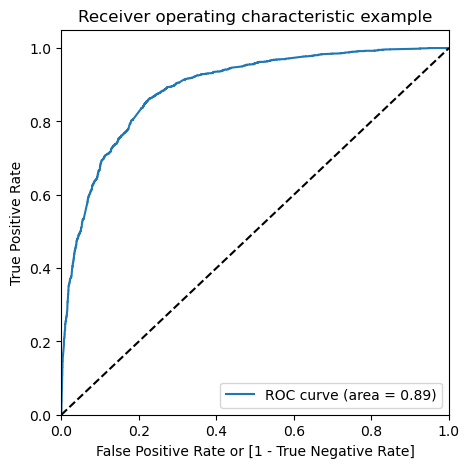

In [94]:
# Defining the function to plot the ROC curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

# Calling the function
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

In [95]:
# Looking for different Threshold:

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head(10)

,Converted,Conversion_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.062241,0,1,0,0,0,0,0,0,0,0,0
1,0,0.062008,0,1,0,0,0,0,0,0,0,0,0
2,0,0.031288,0,1,0,0,0,0,0,0,0,0,0
3,0,0.364200,0,1,1,1,1,0,0,0,0,0,0
4,1,0.490284,0,1,1,1,1,1,0,0,0,0,0
5,0,0.028631,0,1,0,0,0,0,0,0,0,0,0
6,0,0.028631,0,1,0,0,0,0,0,0,0,0,0
7,0,0.063190,0,1,0,0,0,0,0,0,0,0,0
8,0,0.090694,0,1,0,0,0,0,0,0,0,0,0
9,1,0.349842,0,1,1,1,1,0,0,0,0,0,0


In [96]:
# Calculating accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensitivity','specificity'])
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]
print(cutoff_df)

     prob  accuracy  sensitivity  specificity
0.0   0.0  0.381487     1.000000     0.000000
0.1   0.1  0.640032     0.969307     0.436940
0.2   0.2  0.762342     0.918291     0.666155
0.3   0.3  0.802057     0.868934     0.760808
0.4   0.4  0.810285     0.770635     0.834740
0.5   0.5  0.817563     0.699710     0.890253
0.6   0.6  0.807595     0.627540     0.918649
0.7   0.7  0.781329     0.511406     0.947813
0.8   0.8  0.762025     0.428453     0.967767
0.9   0.9  0.715981     0.278723     0.985674


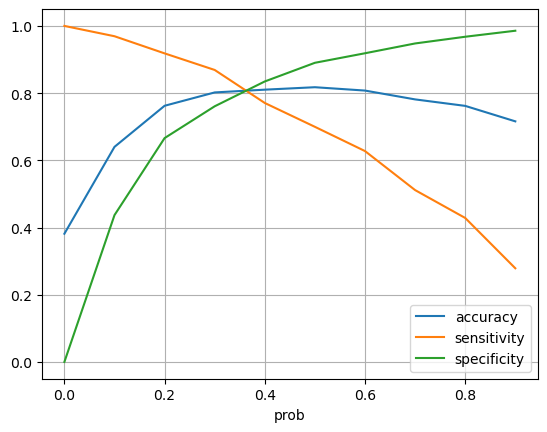

In [97]:
# plotting above numbers:
cutoff_df.plot.line(x='prob', y=['accuracy','sensitivity','specificity'])
plt.grid()
plt.show()

#### Here at around 0.38, all the Three metrics have optimal values. Therefore taking 0.38 as a cutoff. 

In [98]:
# Predicting again using cutoff 0.38
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.38 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.062241,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.062008,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.031288,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.364200,0,1,1,1,1,0,0,0,0,0,0,0
4,1,0.490284,0,1,1,1,1,1,0,0,0,0,0,1


In [99]:
# Calculating Accuracy:
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8118670886075949

In [100]:
# Creatingnew Confusion Matrix:
confusion_mat_new = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion_mat_new

array([[3213,  696],
       [ 493, 1918]], dtype=int64)

In [101]:
# New metrics:
TP = confusion_mat_new[1,1]  
TN = confusion_mat_new[0,0] 
FP = confusion_mat_new[0,1] 
FN = confusion_mat_new[1,0] 

In [102]:
# Calculating Sensitivity:
TP/(TP+FN)

0.7955205309000415

In [103]:
# Calculating Specficity:
TN/(TN+FP)

0.8219493476592479

### Making Predictions on the Test Set

In [104]:
# Applying scaling on the test dataset
numeric_variable = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
data_test[numeric_variable] = scaler.transform(data_test[numeric_variable])
data_test.head()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
4664,614988,0,0.0000,0.000000,0.00000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5394,608470,0,0.2500,0.072183,0.16625,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1595,643701,1,0.2500,0.515405,0.50000,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2111,639359,0,0.4375,0.229754,0.87500,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
9182,580026,0,0.0000,0.000000,0.00000,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [105]:
y_test = data_test.pop("Converted")
X_test = data_test

In [106]:
# Selecting same columns as in training set
col1 = X_train_new.columns
X_test = X_test[col1]
X_test.head()                                                                           

,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Olark Chat,Lead Source_Reference,Do Not Email_Yes,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,What is your current occupation_No Information,What is your current occupation_Working Professional,Last Notable Activity_Email Opened,Last Notable Activity_Modified
4664,0.000000,0,0,1,0,0,0,0,0,0,1,0
5394,0.072183,0,0,1,0,0,0,0,1,0,0,1
1595,0.515405,0,0,0,0,0,0,0,0,1,0,1
2111,0.229754,0,1,0,0,0,0,0,1,0,1,0
9182,0.000000,0,0,1,0,0,0,1,0,0,0,1


In [107]:
X_test.shape

(2709, 12)

In [108]:
# Adding constant variable to test dataframe
X_test_sm = sm.add_constant(X_test)


In [109]:
X_test_sm.head(10)

,const,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Olark Chat,Lead Source_Reference,Do Not Email_Yes,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,What is your current occupation_No Information,What is your current occupation_Working Professional,Last Notable Activity_Email Opened,Last Notable Activity_Modified
4664,1.0,0.000000,0,0,1,0,0,0,0,0,0,1,0
5394,1.0,0.072183,0,0,1,0,0,0,0,1,0,0,1
1595,1.0,0.515405,0,0,0,0,0,0,0,0,1,0,1
2111,1.0,0.229754,0,1,0,0,0,0,0,1,0,1,0
9182,1.0,0.000000,0,0,1,0,0,0,1,0,0,0,1
1055,1.0,0.499120,0,0,0,0,0,0,1,0,0,0,1
541,1.0,0.173415,0,0,0,0,0,0,0,1,0,0,0
446,1.0,0.000000,1,0,0,1,0,0,1,0,1,0,1
3728,1.0,0.016725,0,0,0,0,0,0,0,1,0,0,1
4249,1.0,0.010123,0,0,0,0,1,0,0,1,0,0,1


In [110]:
# Making Predictions:
y_test_pred = logm9.predict(sm.add_constant(X_test))
y_test_pred[:10]

4664    0.364200
5394    0.100541
1595    0.895308
2111    0.090014
9182    0.448216
1055    0.700147
541     0.119722
446     0.986202
3728    0.025021
4249    0.007097
dtype: float64

In [111]:
# Converting y_pred to dataframe:
y_test_pred = pd.DataFrame(y_test_pred)
y_test_pred= y_test_pred.rename(columns = {0 : 'Conversion_Prob'})
y_test_pred.head(10)

,Conversion_Prob
4664,0.364200
5394,0.100541
1595,0.895308
2111,0.090014
9182,0.448216
1055,0.700147
541,0.119722
446,0.986202
3728,0.025021
4249,0.007097


In [112]:
# Appending the dataframes:
y_test_pred.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)
y_test_pred_final = pd.concat([y_test, y_test_pred],axis=1)
y_test_pred_final.head(10)

,Converted,Conversion_Prob
0,0,0.364200
1,0,0.100541
2,1,0.895308
3,0,0.090014
4,0,0.448216
5,1,0.700147
6,0,0.119722
7,1,0.986202
8,0,0.025021
9,0,0.007097


In [113]:
# Making predictions on the test set using 0.38 as the cutoff

y_test_pred_final['final_predicted'] = y_test_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.38 else 0)
y_test_pred_final.head(10)

,Converted,Conversion_Prob,final_predicted
0,0,0.364200,0
1,0,0.100541,0
2,1,0.895308,1
3,0,0.090014,0
4,0,0.448216,1
5,1,0.700147,1
6,0,0.119722,0
7,1,0.986202,1
8,0,0.025021,0
9,0,0.007097,0


In [114]:
# Calculating Accuracy:
metrics.accuracy_score(y_test_pred_final['Converted'], y_test_pred_final.final_predicted)

0.8128460686600222

In [115]:
confusion_mat_test = metrics.confusion_matrix(y_test_pred_final['Converted'], y_test_pred_final.final_predicted )
confusion_mat_test

array([[1342,  301],
       [ 206,  860]], dtype=int64)

In [116]:
TP = confusion_mat_test[1,1]  
TN = confusion_mat_test[0,0] 
FP = confusion_mat_test[0,1] 
FN = confusion_mat_test[1,0] 

In [117]:
# Calculating Sensitivity
TP / float(TP+FN)

0.8067542213883677

In [118]:
# Calculating Specificity
TN / float(TN+FP)

0.8167985392574558